In [1]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
file_names='non-overlapping_includingbidirectional_all_genes_newannotation'
promoterpref = 'promoters_5UTR'
window_bed = f'../../../data/output/{file_names}/rolling_window/{promoterpref}_windows.bed'
TF_diversity_bed = f'../../../data/output/{file_names}/rolling_window/TF_diversity_rw/{promoterpref}_TF_diversity.bed'
promoter_bed = f'../../../data/output/{file_names}/FIMO/{promoterpref}.bed' 
EPD_TSS_bed = f'../../../data/EPD_promoter_analysis/EPDnew_promoters/At_EPDnew.bed'
promoter_no_5UTR = f'../../../data/output/{file_names}/promoters.gff3'#to extract the Araport11 TSSs
Czechowski_gene_categories = f'../../../data/output/{file_names}/genes/{promoterpref}_czechowski_constitutive_variable_random.txt'


In [3]:
#bp covered chromatin files
root_chrom_bp_covered = f'../../../data/output/{file_names}/rolling_window/OpenChromatin_rw/{promoterpref}_root_bpcovered_rw.bed'
shoot_chrom_bp_covered = f'../../../data/output/{file_names}/rolling_window/OpenChromatin_rw/{promoterpref}_shoot_bpcovered_rw.bed'
rootshootintersect_chrom_bp_covered = f'../../../data/output/{file_names}/rolling_window/OpenChromatin_rw/{promoterpref}_rootshootintersect_bpcovered_rw.bed'

In [4]:
#make directory for the plots to be exported to
dirName = f'../../../data/output/{file_names}/rolling_window/TF_diversity_rw/plots'
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " created") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory  ../../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/rolling_window/TF_diversity_rw/plots  already exists


In [5]:
#Read in TF_diversity_bed
TF_diversity = pd.read_table(TF_diversity_bed, sep='\t', header=0)

In [6]:
TF_diversity

,name,Shannon_diversity_TF,Shannon_diversity_TF_family,unique_TF_count,total_TF_count,TF_family_count
0,AT1G01010_1,2.230963,1.027058,6,28,3
1,AT1G01010_12,-0.000000,-0.000000,1,1,1
2,AT1G01010_13,-0.000000,-0.000000,1,1,1
3,AT1G01010_2,2.226916,1.108496,6,36,4
4,AT1G01010_3,2.842371,2.298825,8,14,6
...,...,...,...,...,...,...
342419,AT5G67640_14,0.000000,0.000000,0,0,0
342420,AT5G67640_15,0.000000,0.000000,0,0,0
342421,AT5G67640_16,0.000000,0.000000,0,0,0
342422,AT5G67640_17,0.000000,0.000000,0,0,0


In [7]:
#Read in windows_bed
windows_df = pd.read_table(window_bed, sep='\t', header=None)
cols = ['chr', 'start', 'stop', 'name']
windows_df.columns = cols
#merge windows bed with TF_diversity
TF_diversity = pd.merge(windows_df,TF_diversity, how='left', on='name')
#turn NaN into 0s
TF_diversity[["Shannon_diversity_TF",'Shannon_diversity_TF_family', 'unique_TF_count', 'total_TF_count','TF_family_count']] = TF_diversity[["Shannon_diversity_TF",'Shannon_diversity_TF_family', 'unique_TF_count', 'total_TF_count','TF_family_count']].fillna(0)
#Make AGI column
TF_diversity['AGI'] = TF_diversity.name.str.split('_',expand=True)[0]
#make window number column
TF_diversity['window_number'] = TF_diversity.name.str.split('_',expand=True)[1]
#make df columns integars
TF_diversity = TF_diversity.astype({'stop':'int','start':'int','chr':'int','Shannon_diversity_TF':'int','Shannon_diversity_TF_family':'int', 'unique_TF_count':'int', 'total_TF_count':'int','TF_family_count':'int'})
#add window length column
TF_diversity = TF_diversity.assign(window_length=TF_diversity.stop - TF_diversity.start)

In [8]:
TF_diversity

,chr,start,stop,name,Shannon_diversity_TF,Shannon_diversity_TF_family,unique_TF_count,total_TF_count,TF_family_count,AGI,window_number,window_length
0,1,2659,2759,AT1G01010_21,0,0,0,0,0,AT1G01010,21,100
1,1,2709,2809,AT1G01010_20,0,0,0,0,0,AT1G01010,20,100
2,1,2759,2859,AT1G01010_19,0,0,0,0,0,AT1G01010,19,100
3,1,2809,2909,AT1G01010_18,0,0,0,0,0,AT1G01010,18,100
4,1,2859,2959,AT1G01010_17,0,0,0,0,0,AT1G01010,17,100
...,...,...,...,...,...,...,...,...,...,...,...,...
363248,5,26971348,26971448,AT5G67640_17,0,0,0,0,0,AT5G67640,17,100
363249,5,26971398,26971498,AT5G67640_18,0,0,0,0,0,AT5G67640,18,100
363250,5,26971448,26971548,AT5G67640_19,1,0,2,2,1,AT5G67640,19,100
363251,5,26971498,26971598,AT5G67640_20,1,0,2,2,1,AT5G67640,20,100


In [9]:
#allow colour codes in seaborn
sns.set(color_codes=True)
sns.set_style("whitegrid")

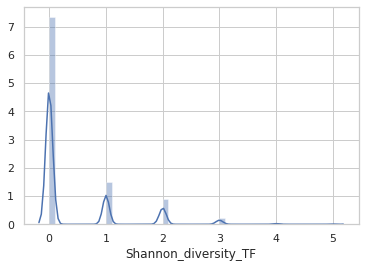

In [10]:
dist_plot = TF_diversity['Shannon_diversity_TF']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

In [11]:
#remove windows with fewer than 100 promoters extending to that location
TF_diversity = TF_diversity[TF_diversity['window_number'].map(TF_diversity['window_number'].value_counts()) > 99]

In [12]:
def add_mostcommon_TSS():
    """add the most common TSS as documented on eukaryotic promoter database Arabidopsis Last modified on EPD 06/06/2018"""

In [13]:
def add_coverage(df,coverage_bed,suffix):
    """add % bp covered data from a bed file to the df. Prefix is a name added to any new columns"""
    #read in bed file
    coverage_df = pd.read_table(coverage_bed, sep='\t', header=None)
    cols = ['chr','start','stop','name','no._of_overlaps', 'no._of_bases_covered','window_length','fraction_bases_covered']
    coverage_df.columns = cols
    #add % bases covered column
    coverage_df['percentage_bases_covered'] = coverage_df['fraction_bases_covered'] * 100
    #filter columns
    coverage_df = coverage_df[['chr','start','stop','name','percentage_bases_covered']]
    #make df columns integars
    df = df.astype({'stop':'int','start':'int','chr':'int'})
    coverage_df = coverage_df.astype({'stop':'int','start':'int','chr':'int'})
    #merge the dfs
    merged = pd.merge(df,coverage_df, how='left',on=['chr','start','stop'],suffixes=('', f'_{suffix}'))
    #remove NaN
    #merged = merged[merged['name'].notnull()] 
    return merged

In [14]:
def windows_coords(variable_of_interest,variable_of_interest_name,variable_of_interest_df,promoter_bed,promoter_no_5UTR,
                   window_offset,EPD_TSS_bed,includeEPDTSS=False,chromatin_tissue_variable='percentage_bases_covered_rootshootintersect_chrom',
                   chromatin_tissue_variable_name='% open chromatin root and shoot intersect',x_range=False,estimator='mean', 
                   genetype=False, genetype2=False, genetype3=False):
    """function to add the centre of each window corresponding to each window no. and return a lineplot. Also add promoter length distributio, Araport TSS distribution,
    EPD TSS distribution (add the most common TSS as documented on eukaryotic promoter database Arabidopsis last modified on EPD 06/06/2018)"""
    #read in bed file
    promoter_df = pd.read_table(promoter_bed, sep='\t', header=None)
    col = ['chr','start','stop','AGI','dot1', 'strand','source','type','dot2','attributes']
    promoter_df.columns = col
    #add promoter length column
    promoter_df['length'] = promoter_df.stop-promoter_df.start  
    #merge promoter_bed with variable_of_interest_df on AGI
    merged = pd.merge(variable_of_interest_df, promoter_df, on='AGI',  how='left',suffixes=('','_wholeprom'))
    #remove NaN
    merged = merged[merged[variable_of_interest].notnull()]
    #make columns integars
    merged = merged.astype({'stop_wholeprom':'int','start_wholeprom':'int','start':'int','stop':'int'})
    #split merged into 2 dfs by strand
    pos = merged[merged.strand == '+'].copy()
    neg = merged[merged.strand == '-'].copy()
    
    #add variable of interest position column where position is the middle of the window, with whole length of the longest promoter
    pos['position'] = (pos.stop_wholeprom) - (pos.start+0.5*(pos.stop-pos.start))
    neg['position'] = (neg.start+0.5*(neg.stop-neg.start)) - neg.start_wholeprom
    merged2 = pd.merge(pos,neg,how='outer')

    merged2 = merged2.astype({'position': 'int64'})
    #get longest transcript TSS distribution (if Araport 11 definition used)
    promoter_no_5UTR_df = pd.read_table(promoter_no_5UTR, sep='\t', header=None)
    col = ['chr', 'source', 'type', 'start','stop', 'dot1','strand','dot2','attributes']
    promoter_no_5UTR_df.columns = col
    #add AGI column
    promoter_no_5UTR_df_agi = promoter_no_5UTR_df.assign(AGI=promoter_no_5UTR_df.attributes.str.extract(r'ID=gene:(.*?)\;'))
    #merged with windows    
    merged2 = pd.merge(merged2,promoter_no_5UTR_df_agi, on='AGI', how='left', suffixes=('','_no_UTR'))
    #remove NaN (promoters in promoters.gff but not in promoters_5UTR)
    merged2 = merged2[merged2.length.notnull()]
    #remove NaN (promoters in promoters_5UTR but not in promoters.gff - ie. only 5'UTRs)
    merged2 = merged2[merged2.chr_no_UTR.notnull()]
    #Get most common transcript TSS location from eukaryotic promoter database (last modified on EPD 06/06/2018)
    #Note - not all promoters have a TSS on EPD
    EPD_TSS_df = pd.read_table(EPD_TSS_bed, delim_whitespace=True, header=None, skiprows=4)
    cols = ['chr','start','stop','transcript_EPD','score_EPD','strand_EPD','thickstart_EPD','thickend_EPD']
    EPD_TSS_df.columns = cols
    #add AGI column
    EPD_TSS_df['AGI'] = EPD_TSS_df.transcript_EPD.str.split('_',expand=True)[0]
    #add TSS location column
    EPD_TSS_df.loc[EPD_TSS_df.strand_EPD == '+', 'TSS_EPD'] = EPD_TSS_df.loc[EPD_TSS_df.strand_EPD == '+', 'thickstart_EPD']
    EPD_TSS_df.loc[EPD_TSS_df.strand_EPD == '-', 'TSS_EPD'] = EPD_TSS_df.loc[EPD_TSS_df.strand_EPD == '-', 'thickend_EPD'] -1
    #merged with windows
    merged2 = pd.merge(merged2,EPD_TSS_df, on='AGI', how='left', suffixes=('','_EPD'))

    #remove NaN (promoters in EPD but not in promoters_5UTR)
    merged2 = merged2[merged2.length.notnull()]   
    
    #calculate longest promoter length based on window cutoff
    number_of_windows = len(variable_of_interest_df.window_number.unique())
    window_length = variable_of_interest_df.window_length.max()    
    length_of_longest_promoter = number_of_windows*(window_length-window_offset)

    #make 0 start like in bed files
    merged2.start_no_UTR = merged2.start_no_UTR -1
    #add Araport TSS location column
    #merged2['TSS'] = int()
    merged2.loc[merged2.strand == '+', 'TSS'] = merged2.loc[merged2.strand == '+', 'stop_no_UTR']
    merged2.loc[merged2.strand == '-', 'TSS'] = merged2.loc[merged2.strand == '-', 'start_no_UTR'] -1
    #transform TSS location in the same way as the position column
    merged2.loc[merged2.strand == '-', 'TSS_transformed_Araport11'] = merged2.loc[merged2.strand == '-', 'TSS'] - merged2.loc[merged2.strand == '-','start_wholeprom']
    merged2.loc[merged2.strand == '+', 'TSS_transformed_Araport11'] = merged2.loc[merged2.strand == '+', 'stop_wholeprom'] - merged2.loc[merged2.strand == '+', 'TSS']
    #transfrom PED TSS column in the same way as the position column
    merged2.loc[merged2.strand == '-', 'TSS_transformed_EPD'] = merged2.loc[merged2.strand == '-', 'TSS_EPD'] - merged2.loc[merged2.strand == '-','start_wholeprom']
    merged2.loc[merged2.strand == '+', 'TSS_transformed_EPD'] = merged2.loc[merged2.strand == '+', 'stop_wholeprom'] - merged2.loc[merged2.strand == '+', 'TSS_EPD']
    
    #make integars
    merged2 = merged2.astype({'TSS_transformed_EPD':'float64','start_no_UTR':'float64','stop_no_UTR':'float64','TSS':'float64','TSS_transformed_Araport11':'float64',f'{variable_of_interest}':'float64',f'{chromatin_tissue_variable}':'float64'})
    #return merged2[['AGI','strand','start','stop','start_wholeprom','stop_wholeprom','start_no_UTR','stop_no_UTR','TSS','TSS_transformed','position','chr_no_UTR','window_number']]

    #make all values of interest negative as upstream from ATG
    merged_positive = merged2.copy()
    merged2[['length','TSS_transformed_Araport11','position','TSS_transformed_EPD']] = -merged2[['length','TSS_transformed_Araport11','position','TSS_transformed_EPD']]
    #change estimator
    if estimator == 'mean':
        new_estimator=estimator
        
    if estimator == 'median':
        new_estimator = np.median
    #set number of subplots so can easily change all output possibilities, where subplotA is the top
    subplots = 4
    
    #make subplots
    if includeEPDTSS == True:
        subplots = subplots + 1
        f, axes = plt.subplots(subplots, figsize=(10,10))
        OpenChromplot = axes[subplots-subplots]
        Araport11TSSplot = axes[subplots-(subplots-1)]
        EPDTSSplot = axes[subplots-(subplots-2)]   
        promlengthsplot = axes[subplots-(subplots-3)]
        variableofinterestplot = axes[subplots-(subplots-4)]
    else:
        f, axes = plt.subplots(subplots, figsize=(10,8))
        OpenChromplot = axes[subplots-subplots]
        Araport11TSSplot = axes[subplots-(subplots-1)]
        promlengthsplot = axes[subplots-(subplots-2)]
        variableofinterestplot = axes[subplots-(subplots-3)]

   
    
    #check the plot axes variables are there. If they are not, assign None to them
    try:
        OpenChromplot
    except NameError:
        OpenChromplot = None
    try:
        Araport11TSSplot
    except NameError:
        Araport11TSSplot = None
    try:
        EPDTSSplot
    except NameError:
        EPDTSSplot = None
    try:
        promlengthsplot
    except NameError:
        promlengthsplot = None
    try:
        variableofinterestplot
    except NameError:
        variableofinterestplot = None
    
    #If EPD TSS plot is present, filter promoters which aren't in EPD to remove NaNs
    if EPDTSSplot != None:
        #remove NaN (promoters in promoters_5UTR but not in promoters.gff - ie. only 5'UTRs)
        merged2 = merged2[merged2.TSS_transformed_EPD.notnull()]
    
    
    

    if genetype==False:
        
        #length_of_longest_promoter = merged_positive.length.max()
        #if openchromplot variable present, add that plot

        if OpenChromplot !=None:
            #Open chromatin lineplot
            sns.lineplot(y=merged2[chromatin_tissue_variable],x=merged2.position,ax=OpenChromplot,estimator=new_estimator)
            #set titles and axes labels
            OpenChromplot.set_title(f'All promoters {chromatin_tissue_variable_name}', weight='bold')
            OpenChromplot.set_ylabel(f'{estimator} % open chromatin')
            OpenChromplot.set_xlabel('')
            OpenChromplot.set_xticklabels([])  
        
        #if Araport11TSSplot variable present, add that plot
        if Araport11TSSplot !=None:
            #AraportTSS distribution
            sns.distplot(merged2.TSS_transformed_Araport11, ax=Araport11TSSplot)
            #set titles and axes labels
            Araport11TSSplot.set_title(f'All promoters Araport11 TSS distribution', weight='bold')
            #density is kernal density estimation
            Araport11TSSplot.set_ylabel('Density')
            Araport11TSSplot.set_xlabel('')
            Araport11TSSplot.set_xticklabels([])
        
        #if includeEPDTSS variable present, add that plot
        if includeEPDTSS ==True:
            #EPDTSS distribution
            sns.distplot(merged2.TSS_transformed_EPD, ax=EPDTSSplot)
            #set titles and axes labels
            EPDTSSplot.set_title(f'All promoters EPD TSS distribution', weight='bold')
            EPDTSSplot.set_ylabel('Density')
            EPDTSSplot.set_xlabel('')
            EPDTSSplot.set_xticklabels([])  
        
        #if promlengthsplot variable present, add that plot
        if promlengthsplot !=None:
            #promoter length dist_plot
            sns.distplot(merged2.length, ax=promlengthsplot)
            #set titles and axes labels
            promlengthsplot.set_title(f'All promoters length distribution', weight='bold')  
            promlengthsplot.set_ylabel('Density')
            promlengthsplot.set_xlabel('')
            promlengthsplot.set_xticklabels([])
        #if variableofinterestplot variable present, add that plot
        if variableofinterestplot !=None:
            #variable of interest lineplot
            sns.lineplot(y=merged2[variable_of_interest], x=merged2.position, ax=variableofinterestplot,estimator=new_estimator) 
            #set titles and axes labels
            variableofinterestplot.set_title(f'All promoters sliding windows {variable_of_interest_name}', weight='bold')
            variableofinterestplot.set_ylabel(f'{estimator} {variable_of_interest_name}')
            variableofinterestplot.set_xlabel('position upstream of ATG')

               
    elif genetype2==False:
        #filter so only genetype subset present
        merged2 = merged2[merged2.gene_type.notnull()]
        #if openchromplot variable present, add that plot
        if OpenChromplot !=None:        
            #Open chromatin lineplot
            sns.lineplot(y=merged2[merged2.gene_type == genetype][chromatin_tissue_variable],x=merged2[merged2.gene_type == genetype].position,ax=OpenChromplot,estimator=new_estimator)
            #set titles and axes labels
            OpenChromplot.set_title(f'{genetype} {chromatin_tissue_variable_name}', weight='bold')
            OpenChromplot.set_ylabel(f'{estimator} % open chromatin')
            OpenChromplot.set_xlabel('')
            OpenChromplot.set_xticklabels([]) 
            
        #if Araport11TSSplot variable present, add that plot
        if Araport11TSSplot !=None:
            #Araport11 TSS distribution
            sns.distplot(merged2[merged2.gene_type == genetype].TSS_transformed_Araport11, ax=Araport11TSSplot)
            #set titles and axes labels
            Araport11TSSplot.set_title(f'{genetype} Araport11 TSS distribution', weight='bold')
            #density is kernal density estimation
            Araport11TSSplot.set_ylabel('Density')
            Araport11TSSplot.set_xlabel('')
            Araport11TSSplot.set_xticklabels([])
        #if includeEPDTSS variable present, add that plot
        if includeEPDTSS ==True:
            #EPD TSS distribution
            sns.distplot(merged2[merged2.gene_type == genetype].TSS_transformed_EPD, ax=EPDTSSplot)
            #set titles and axes labels
            EPDTSSplot.set_title(f'{genetype} EPD TSS distribution', weight='bold')
            EPDTSSplot.set_ylabel('Density')
            EPDTSSplot.set_xlabel('')
            EPDTSSplot.set_xticklabels([])  
        
        #if promlengthsplot variable present, add that plot
        if promlengthsplot !=None:
            #promoter length dist_plot
            sns.distplot(merged2[merged2.gene_type == genetype].length, ax=promlengthsplot)
            #set titles and axes labels
            promlengthsplot.set_title(f'{genetype} promoter length distribution', weight='bold')  
            promlengthsplot.set_ylabel('Density')
            promlengthsplot.set_xlabel('')
            promlengthsplot.set_xticklabels([])
        
        #if variableofinterestplot variable present, add that plot
        if variableofinterestplot !=None:
            #variable of interest lineplot
            sns.lineplot(y=merged2[merged2.gene_type == genetype][variable_of_interest], x=merged2[merged2.gene_type == genetype].position, ax=variableofinterestplot, estimator=new_estimator) 
            #set titles and axes labels
            variableofinterestplot.set_title(f'{genetype} {variable_of_interest_name}', weight='bold')
            variableofinterestplot.set_ylabel(f'{estimator} {variable_of_interest_name}')
            variableofinterestplot.set_xlabel('position upstream of ATG')
        
        #set y axis as maximum mean window % bp covered of all genetype subset        
        #variableofinterestplot.set_ylim([0,merged2.groupby('window_number')[variable_of_interest].median().max()+20])
        #set x axis range if specified 
#         if x_range==False:
#             pass
#         else:
#             length_of_longest_promoter = x_range
        
#         #for all subplots:
#         for n in axes:
#             #remove grids
#             n.grid(False)
#             n.set_xlim([-length_of_longest_promoter,0])        
#         f.tight_layout()
        
    elif genetype3==False:
        #filter so only genetype subset present
        merged2 = merged2[merged2.gene_type.notnull()]
        #if openchromplot variable present, add that plot
        if OpenChromplot !=None:                      
            #Open chromatin lineplot
            sns.lineplot(y=merged2[merged2.gene_type == genetype][chromatin_tissue_variable],x=merged2[merged2.gene_type == genetype].position,ax=OpenChromplot,estimator=new_estimator,label=genetype)
            sns.lineplot(y=merged2[merged2.gene_type == genetype2][chromatin_tissue_variable],x=merged2[merged2.gene_type == genetype2].position,ax=OpenChromplot,estimator=new_estimator,label=genetype2)
            #set titles & axes names
            OpenChromplot.set_title(f'{chromatin_tissue_variable_name}', weight='bold')
            OpenChromplot.set_ylabel(f'{estimator} % open chromatin')
            OpenChromplot.set_xlabel('')           
            OpenChromplot.set_xticklabels([])
        #if Araport11TSSplot variable present, add that plot
        if Araport11TSSplot !=None:
            #Araport TSS distribution
            sns.distplot(merged2[merged2.gene_type == genetype].TSS_transformed_Araport11, ax=Araport11TSSplot,hist=None,label=genetype)
            sns.distplot(merged2[merged2.gene_type == genetype2].TSS_transformed_Araport11, ax=Araport11TSSplot,hist=None,label=genetype2)
            #set titles & axes names
            Araport11TSSplot.set_title(f'Araport11 TSS distribution', weight='bold')
            #density is kernal density estimation
            Araport11TSSplot.set_ylabel('Density')
            Araport11TSSplot.set_xlabel('')
            Araport11TSSplot.set_xticklabels([])
        #if includeEPDTSS variable present, add that plot
        if includeEPDTSS ==True:
            #EPD TSS distribution
            sns.distplot(merged2[merged2.gene_type == genetype].TSS_transformed_EPD, ax=EPDTSSplot,hist=None,label=genetype)
            sns.distplot(merged2[merged2.gene_type == genetype2].TSS_transformed_EPD, ax=EPDTSSplot,hist=None,label=genetype2)
            #set titles & axes names
            EPDTSSplot.set_title(f'{genetype} EPD TSS distribution', weight='bold')
            EPDTSSplot.set_ylabel('Density')
            EPDTSSplot.set_xlabel('')
            EPDTSSplot.set_xticklabels([])
        #if promlengthsplot variable present, add that plot
        if promlengthsplot !=None:
            #promoter length dist_plot
            sns.distplot(merged2[merged2.gene_type == genetype].length, ax=promlengthsplot,hist=None,label=genetype)
            sns.distplot(merged2[merged2.gene_type == genetype2].length, ax=promlengthsplot,hist=None,label=genetype2)
            #set titles & axes names        
            promlengthsplot.set_title(f'promoter length distribution', weight='bold')  
            promlengthsplot.set_ylabel('Density')
            promlengthsplot.set_xlabel('')
            promlengthsplot.set_xticklabels([])
        #if variableofinterestplot variable present, add that plot
        if variableofinterestplot !=None:
            #lineplot variable of interest
            l1=sns.lineplot(y=merged2[merged2.gene_type == genetype][variable_of_interest], x=merged2[merged2.gene_type == genetype].position, ax=variableofinterestplot,label=genetype,estimator=new_estimator)
            l2=sns.lineplot(y=merged2[merged2.gene_type == genetype2][variable_of_interest], x=merged2[merged2.gene_type == genetype2].position, ax=variableofinterestplot,label=genetype2,estimator=new_estimator) 
            #set titles & axes names
            variableofinterestplot.set_title(f'{variable_of_interest_name}', weight='bold')
            variableofinterestplot.set_ylabel(f'{estimator} {variable_of_interest_name}')
            variableofinterestplot.set_xlabel('position upstream of ATG')
        #set y axis as maximum mean window % bp covered of all genetype subset        
        #axes[2].set_ylim([0,merged2.groupby('window_number').percentage_bases_covered.median().max()+20])
        #gene_type labels
        gene_type_labels = [genetype, genetype2]
        # Create the legend
        axes[0].legend()

#         if x_range==False:
#             pass
#         else:
#             length_of_longest_promoter = x_range

#         #for all subplots:
#         for n in axes:
#             #remove grids
#             n.grid(False)
#             n.set_xlim([-length_of_longest_promoter,0])
#         f.tight_layout()
    else:
        #filter so only genetype subset present
        merged2 = merged2[merged2.gene_type.notnull()]
        #if openchromplot variable present, add that plot
        if OpenChromplot !=None:                      
            #Open chromatin lineplot
            sns.lineplot(y=merged2[merged2.gene_type == genetype][chromatin_tissue_variable],x=merged2[merged2.gene_type == genetype].position,ax=OpenChromplot,estimator=new_estimator,label=genetype)
            sns.lineplot(y=merged2[merged2.gene_type == genetype2][chromatin_tissue_variable],x=merged2[merged2.gene_type == genetype2].position,ax=OpenChromplot,estimator=new_estimator,label=genetype2)
            sns.lineplot(y=merged2[merged2.gene_type == genetype3][chromatin_tissue_variable],x=merged2[merged2.gene_type == genetype3].position,ax=OpenChromplot,estimator=new_estimator,label=genetype3)
            #set titles & axes names 
            OpenChromplot.set_title(f'{chromatin_tissue_variable_name}', weight='bold')
            OpenChromplot.set_ylabel(f'{estimator} % open chromatin')
            OpenChromplot.set_xlabel('')           
            OpenChromplot.set_xticklabels([])          
        #if Araport11TSSplot variable present, add that plot
        if Araport11TSSplot !=None:
            #Araport11 TSS distribution
            sns.distplot(merged2[merged2.gene_type == genetype].TSS_transformed_Araport11, ax=Araport11TSSplot,hist=None,label=genetype)
            sns.distplot(merged2[merged2.gene_type == genetype2].TSS_transformed_Araport11, ax=Araport11TSSplot,hist=None,label=genetype2)
            sns.distplot(merged2[merged2.gene_type == genetype3].TSS_transformed_Araport11, ax=Araport11TSSplot,hist=None,label=genetype3)
            #set titles & axes names
            Araport11TSSplot.set_title(f'Araport11 TSS distribution', weight='bold')
            #density is kernal density estimation
            Araport11TSSplot.set_ylabel('Density')
            Araport11TSSplot.set_xlabel('')
            Araport11TSSplot.set_xticklabels([])
        #if includeEPDTSS variable present, add that plot
        if includeEPDTSS ==True:
            #EPD TSS distribution
            sns.distplot(merged2[merged2.gene_type == genetype].TSS_transformed_EPD, ax=EPDTSSplot,hist=None,label=genetype)
            sns.distplot(merged2[merged2.gene_type == genetype2].TSS_transformed_EPD, ax=EPDTSSplot,hist=None,label=genetype2)
            sns.distplot(merged2[merged2.gene_type == genetype3].TSS_transformed_EPD, ax=EPDTSSplot,hist=None,label=genetype3)
            #set titles & axes names
            EPDTSSplot.set_title(f'EPD TSS distribution', weight='bold')
            EPDTSSplot.set_ylabel('Density')
            EPDTSSplot.set_xlabel('')
            EPDTSSplot.set_xticklabels([])  
        #if promlengthsplot variable present, add that plot
        if promlengthsplot !=None:
            #promoter length dist_plot
            sns.distplot(merged2[merged2.gene_type == genetype].length, ax=promlengthsplot,hist=None,label=genetype)
            sns.distplot(merged2[merged2.gene_type == genetype2].length, ax=promlengthsplot,hist=None,label=genetype2)
            sns.distplot(merged2[merged2.gene_type == genetype3].length, ax=promlengthsplot,hist=None,label=genetype3)
            #set titles & axes names 
            promlengthsplot.set_title(f'promoter length distribution', weight='bold')  
            promlengthsplot.set_ylabel('Density')
            promlengthsplot.set_xlabel('')
            promlengthsplot.set_xticklabels([])
        #if variableofinterestplot variable present, add that plot
        if variableofinterestplot !=None:
            #lineplot
            l1=sns.lineplot(y=merged2[merged2.gene_type == genetype][variable_of_interest], x=merged2[merged2.gene_type == genetype].position, ax=variableofinterestplot, label=genetype,estimator=new_estimator)
            l2=sns.lineplot(y=merged2[merged2.gene_type == genetype2][variable_of_interest], x=merged2[merged2.gene_type == genetype2].position, ax=variableofinterestplot,label=genetype2,estimator=new_estimator)
            l3=sns.lineplot(y=merged2[merged2.gene_type == genetype3][variable_of_interest], x=merged2[merged2.gene_type == genetype3].position, ax=variableofinterestplot,label=genetype3,estimator=new_estimator)
            #set titles & axes names      
            variableofinterestplot.set_title(f'{variable_of_interest_name}', weight='bold')
            variableofinterestplot.set_ylabel(f'{estimator} {variable_of_interest_name}')
            variableofinterestplot.set_xlabel('position upstream of ATG')
        #set y axis as maximum mean window % bp covered of all genetype subset        
        #axes[2].set_ylim([0,merged2.groupby('window_number').percentage_bases_covered.median().max()+20])
        #gene_type labels
        gene_type_labels = [genetype, genetype2, genetype3]
        # Create the legend
        axes[0].legend()
        #set x axis length
#         if x_range==False:
#             pass
#         else:
#             length_of_longest_promoter = x_range

        
#         #for all subplots:
#         for n in axes:
#             #remove grids
#             n.grid(False)
#             n.set_xlim([-length_of_longest_promoter,0])
#             leg = n.legend()
#         f.tight_layout()
    #set x axis range if specified    
    if x_range==False:
        pass
    else:
        length_of_longest_promoter = x_range
        
    #for all subplots:
    for n in axes:
        #remove grids
        n.grid(False)
        n.set_xlim([-length_of_longest_promoter,0])
    #set a tight layout
    f.tight_layout()
    
    return merged2

In [15]:
def add_genetype(df,gene_categories):
    """function to add gene type to the df, and remove random genes"""
    select_genes = pd.read_table(gene_categories, sep='\t', header=None)
    cols = ['AGI', 'gene_type']
    select_genes.columns = cols

    merged = pd.merge(select_genes, df, on='AGI', how='left')   
   # no_random = merged_renamed[merged_renamed.gene_type != 'random']
  #  no_random.reset_index(drop=True, inplace=True)
    
    return merged

In [16]:
#add root chromatin coverage data
TF_diversity = add_coverage(TF_diversity, root_chrom_bp_covered,'root_chrom')
#add shoot chromatin coverage data
TF_diversity = add_coverage(TF_diversity, shoot_chrom_bp_covered,'shoot_chrom')
#add rootshootintersect chromatin coverage data
TF_diversity = add_coverage(TF_diversity, rootshootintersect_chrom_bp_covered,'rootshootintersect_chrom')

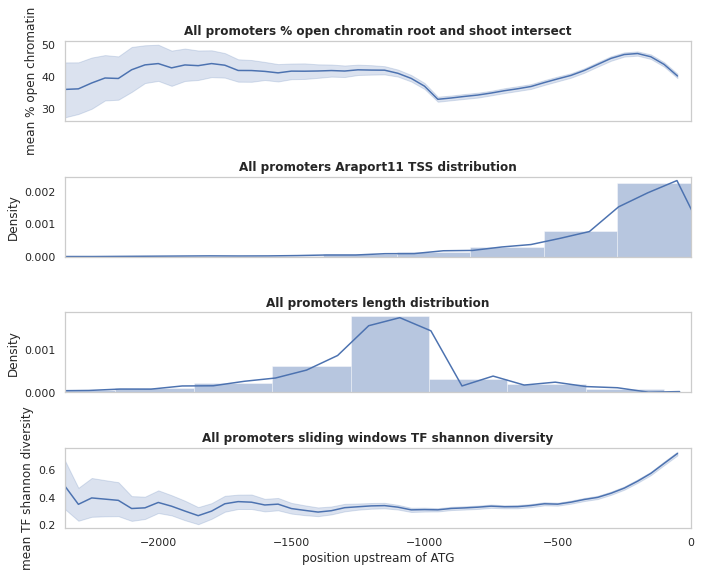

In [17]:
#all promoters in genome
all_proms = windows_coords('Shannon_diversity_TF','TF shannon diversity',TF_diversity,promoter_bed,promoter_no_5UTR,50,EPD_TSS_bed)

In [18]:
all_proms[['start_no_UTR','stop_no_UTR', 'strand','TSS']]

,start_no_UTR,stop_no_UTR,strand,TSS
0,2630.0,3630.0,+,3630.0
1,2630.0,3630.0,+,3630.0
2,2630.0,3630.0,+,3630.0
3,2630.0,3630.0,+,3630.0
4,2630.0,3630.0,+,3630.0
...,...,...,...,...
358595,26970668.0,26971668.0,-,26970667.0
358596,26970668.0,26971668.0,-,26970667.0
358597,26970668.0,26971668.0,-,26970667.0
358598,26970668.0,26971668.0,-,26970667.0


In [19]:
all_proms[all_proms.strand_EPD == '-']

,chr,start,stop,name,Shannon_diversity_TF,Shannon_diversity_TF_family,unique_TF_count,total_TF_count,TF_family_count,AGI,...,stop_EPD,transcript_EPD,score_EPD,strand_EPD,thickstart_EPD,thickend_EPD,TSS_EPD,TSS,TSS_transformed_Araport11,TSS_transformed_EPD
178693,1,8666,8766,AT1G01020_1,2.0,1,5,61,3,AT1G01020,...,8762.0,AT1G01020_1,900.0,-,8702.0,8713.0,8712.0,9129.0,-463.0,-46.0
178694,1,8716,8816,AT1G01020_2,0.0,0,0,0,0,AT1G01020,...,8762.0,AT1G01020_1,900.0,-,8702.0,8713.0,8712.0,9129.0,-463.0,-46.0
178695,1,8766,8866,AT1G01020_3,0.0,0,0,0,0,AT1G01020,...,8762.0,AT1G01020_1,900.0,-,8702.0,8713.0,8712.0,9129.0,-463.0,-46.0
178696,1,8816,8916,AT1G01020_4,0.0,0,0,0,0,AT1G01020,...,8762.0,AT1G01020_1,900.0,-,8702.0,8713.0,8712.0,9129.0,-463.0,-46.0
178697,1,8866,8966,AT1G01020_5,0.0,0,0,0,0,AT1G01020,...,8762.0,AT1G01020_1,900.0,-,8702.0,8713.0,8712.0,9129.0,-463.0,-46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358574,5,26966820,26966920,AT5G67620_23,0.0,0,0,0,0,AT5G67620,...,26966045.0,AT5G67620_1,900.0,-,26965985.0,26965996.0,26965995.0,26966009.0,-289.0,-275.0
358575,5,26966870,26966970,AT5G67620_24,0.0,0,0,0,0,AT5G67620,...,26966045.0,AT5G67620_1,900.0,-,26965985.0,26965996.0,26965995.0,26966009.0,-289.0,-275.0
358576,5,26969306,26969406,AT5G67630_1,4.0,2,27,36,8,AT5G67630,...,26969433.0,AT5G67630_1,900.0,-,26969373.0,26969384.0,26969383.0,26969399.0,-93.0,-77.0
358577,5,26969356,26969456,AT5G67630_2,1.0,0,4,7,2,AT5G67630,...,26969433.0,AT5G67630_1,900.0,-,26969373.0,26969384.0,26969383.0,26969399.0,-93.0,-77.0


In [20]:
all_proms[all_proms.TSS_transformed_EPD != all_proms.TSS_transformed_Araport11]

,chr,start,stop,name,Shannon_diversity_TF,Shannon_diversity_TF_family,unique_TF_count,total_TF_count,TF_family_count,AGI,...,stop_EPD,transcript_EPD,score_EPD,strand_EPD,thickstart_EPD,thickend_EPD,TSS_EPD,TSS,TSS_transformed_Araport11,TSS_transformed_EPD
21,1,51238,51338,AT1G01110_19,0.0,0,0,0,0,AT1G01110,...,52867.0,AT1G01110_1,900.0,+,52856.0,52867.0,52856.0,51952.0,-286.0,618.0
22,1,51288,51388,AT1G01110_18,0.0,0,0,0,0,AT1G01110,...,52867.0,AT1G01110_1,900.0,+,52856.0,52867.0,52856.0,51952.0,-286.0,618.0
23,1,51338,51438,AT1G01110_17,0.0,0,0,0,0,AT1G01110,...,52867.0,AT1G01110_1,900.0,+,52856.0,52867.0,52856.0,51952.0,-286.0,618.0
24,1,51388,51488,AT1G01110_16,0.0,0,0,0,0,AT1G01110,...,52867.0,AT1G01110_1,900.0,+,52856.0,52867.0,52856.0,51952.0,-286.0,618.0
25,1,51438,51538,AT1G01110_15,0.0,0,0,0,0,AT1G01110,...,52867.0,AT1G01110_1,900.0,+,52856.0,52867.0,52856.0,51952.0,-286.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358595,5,26971348,26971448,AT5G67640_17,0.0,0,0,0,0,AT5G67640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26970667.0,-119.0,NaN
358596,5,26971398,26971498,AT5G67640_18,0.0,0,0,0,0,AT5G67640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26970667.0,-119.0,NaN
358597,5,26971448,26971548,AT5G67640_19,1.0,0,2,2,1,AT5G67640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26970667.0,-119.0,NaN
358598,5,26971498,26971598,AT5G67640_20,1.0,0,2,2,1,AT5G67640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26970667.0,-119.0,NaN


## Now do constitutive and variable promoter from Czechowski et al 2005

In [21]:
TF_diversity_prom_types = add_genetype(TF_diversity, Czechowski_gene_categories)

In [22]:
TF_diversity_prom_types

,AGI,gene_type,chr,start,stop,name,Shannon_diversity_TF,Shannon_diversity_TF_family,unique_TF_count,total_TF_count,TF_family_count,window_number,window_length,name_root_chrom,percentage_bases_covered,name_shoot_chrom,percentage_bases_covered_shoot_chrom,name_rootshootintersect_chrom,percentage_bases_covered_rootshootintersect_chrom
0,AT4G34270,constitutive,4,16406153,16406253,AT4G34270_1,0,0,0,0,0,1,100,AT4G34270_1,100.0,AT4G34270_1,100.0,AT4G34270_1,100.0
1,AT4G34270,constitutive,4,16406203,16406303,AT4G34270_2,0,0,0,0,0,2,100,AT4G34270_2,100.0,AT4G34270_2,100.0,AT4G34270_2,100.0
2,AT4G34270,constitutive,4,16406253,16406353,AT4G34270_3,0,0,0,0,0,3,100,AT4G34270_3,100.0,AT4G34270_3,100.0,AT4G34270_3,100.0
3,AT4G34270,constitutive,4,16406303,16406403,AT4G34270_4,0,0,0,0,0,4,100,AT4G34270_4,100.0,AT4G34270_4,100.0,AT4G34270_4,100.0
4,AT4G34270,constitutive,4,16406353,16406453,AT4G34270_5,0,0,0,0,0,5,100,AT4G34270_5,100.0,AT4G34270_5,100.0,AT4G34270_5,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679,AT4G39950,control,4,18524814,18524914,AT4G39950_5,0,0,0,0,0,5,100,AT4G39950_5,100.0,AT4G39950_5,35.0,AT4G39950_5,35.0
5680,AT4G39950,control,4,18524864,18524964,AT4G39950_4,0,0,0,0,0,4,100,AT4G39950_4,100.0,AT4G39950_4,85.0,AT4G39950_4,85.0
5681,AT4G39950,control,4,18524914,18525014,AT4G39950_3,0,0,0,0,0,3,100,AT4G39950_3,100.0,AT4G39950_3,100.0,AT4G39950_3,100.0
5682,AT4G39950,control,4,18524964,18525064,AT4G39950_2,0,0,0,0,0,2,100,AT4G39950_2,100.0,AT4G39950_2,100.0,AT4G39950_2,100.0


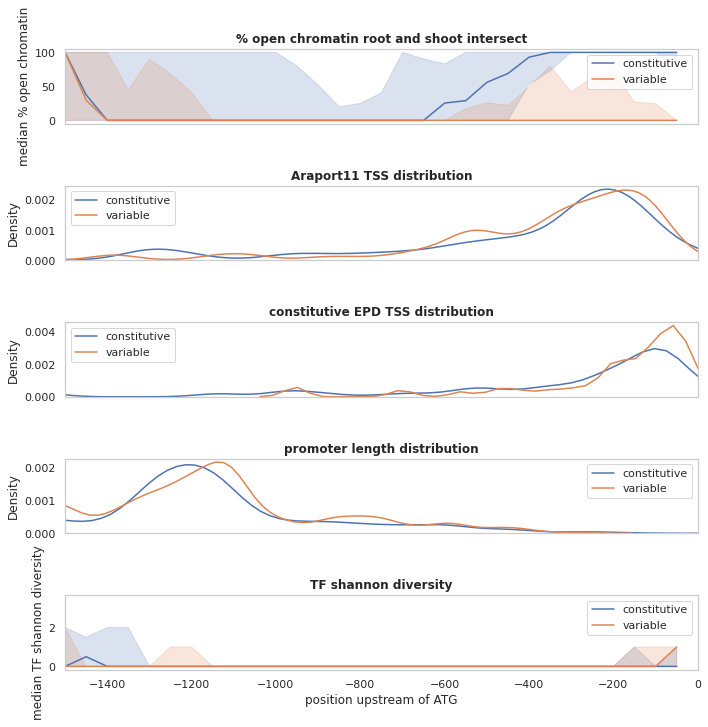

In [23]:
#TF Shannon diversity median
rolling_rootshootintersect = windows_coords('Shannon_diversity_TF','TF shannon diversity',TF_diversity_prom_types,promoter_bed,promoter_no_5UTR,
                         50,EPD_TSS_bed,includeEPDTSS=True, x_range=1500,estimator='median',  genetype='constitutive', genetype2='variable')

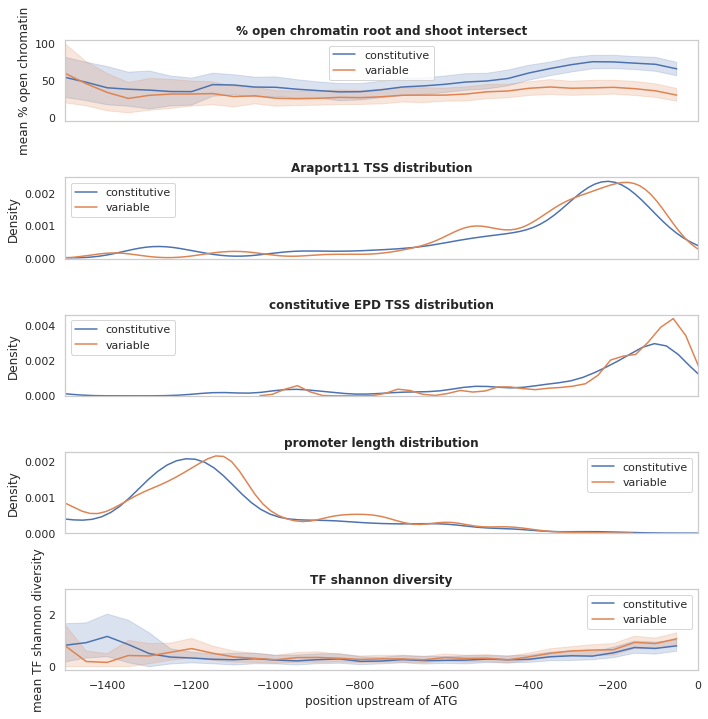

In [24]:
#TF Shannon diversity mean
rolling_rootshootintersect = windows_coords('Shannon_diversity_TF','TF shannon diversity',TF_diversity_prom_types,promoter_bed,promoter_no_5UTR,
                         50,EPD_TSS_bed,includeEPDTSS=True,x_range=1500,estimator='mean',  genetype='constitutive', genetype2='variable')

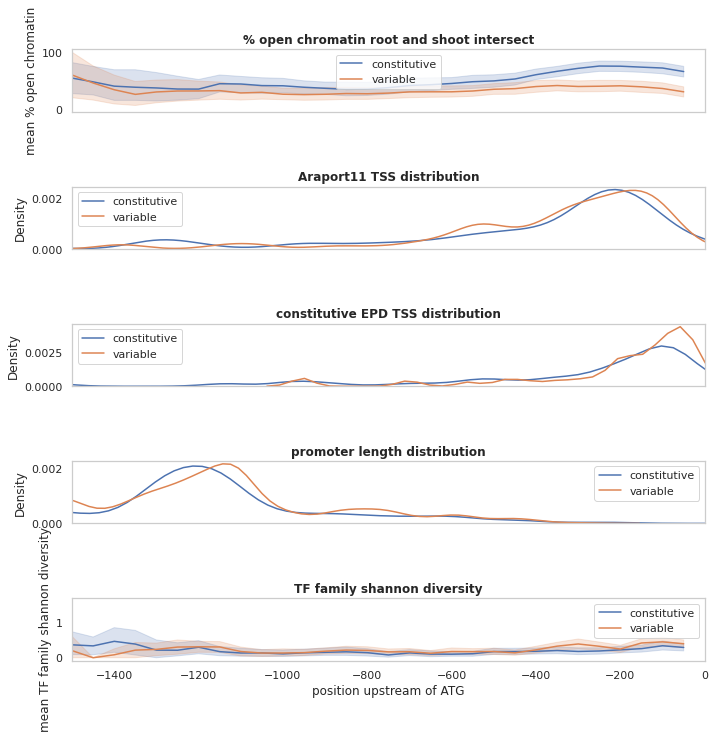

In [25]:
#TF family Shannon diversity mean
rolling_rootshootintersect = windows_coords('Shannon_diversity_TF_family','TF family shannon diversity',TF_diversity_prom_types,promoter_bed,promoter_no_5UTR,
                         50,EPD_TSS_bed,includeEPDTSS=True,x_range=1500,estimator='mean',  genetype='constitutive', genetype2='variable')

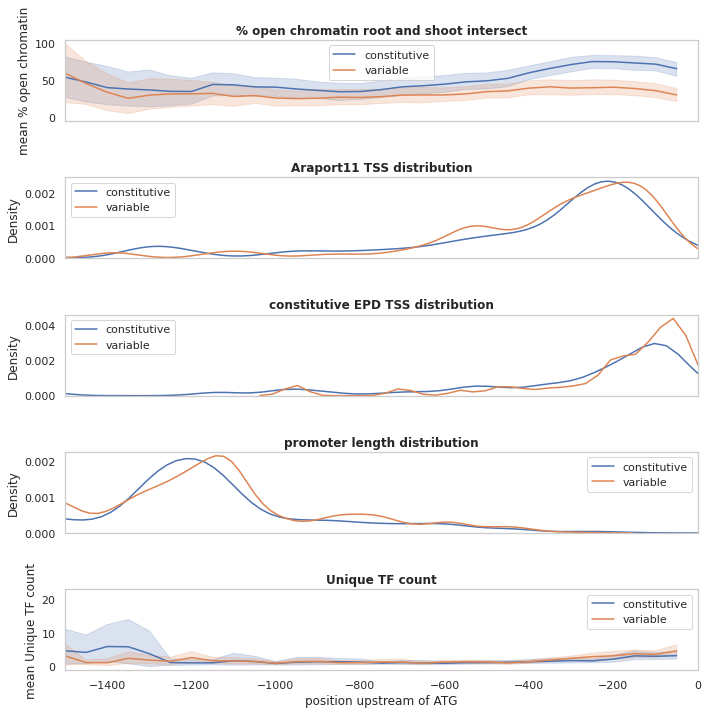

In [26]:
#unique_TF_count mean
rolling_rootshootintersect = windows_coords('unique_TF_count','Unique TF count',TF_diversity_prom_types,promoter_bed,promoter_no_5UTR,
                         50,EPD_TSS_bed,includeEPDTSS=True,x_range=1500,estimator='mean',  genetype='constitutive', genetype2='variable')

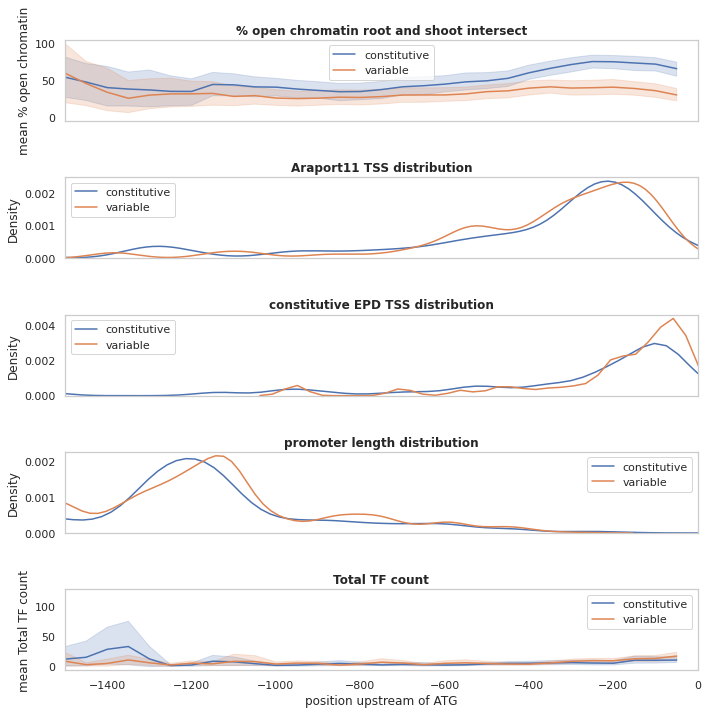

In [27]:
#total_TF_count mean
rolling_rootshootintersect = windows_coords('total_TF_count','Total TF count',TF_diversity_prom_types,promoter_bed,promoter_no_5UTR,
                         50,EPD_TSS_bed,includeEPDTSS=True,x_range=1500,estimator='mean',  genetype='constitutive', genetype2='variable')

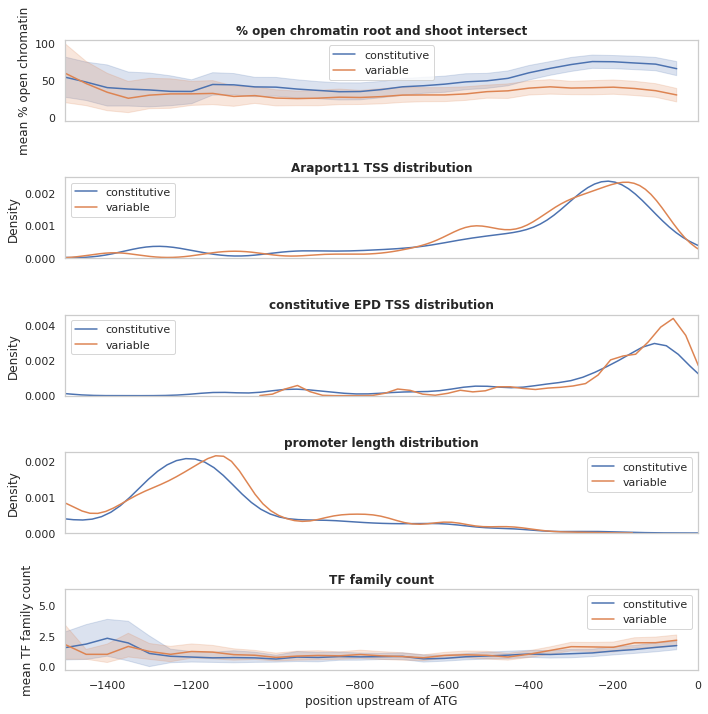

In [28]:
#TF_family_count mean
rolling_rootshootintersect = windows_coords('TF_family_count','TF family count',TF_diversity_prom_types,promoter_bed,promoter_no_5UTR,
                         50,EPD_TSS_bed,includeEPDTSS=True,x_range=1500,estimator='mean',  genetype='constitutive', genetype2='variable')